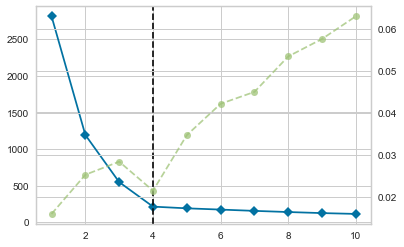

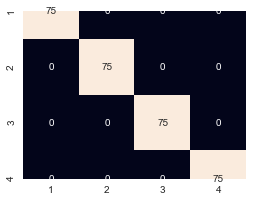

In [2]:
# Import Block
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import mode
import numpy
import seaborn
import matplotlib.pyplot as pyplot

## IPython tester.
## Base Python3 doesn't have magic functions, so this effectively only runs this in an IPython environment.
## No need to run an equivalent in command line, as matplotlib won't display properly inline there anyways.
%matplotlib inline

## Base Project Code
## Author: Rui Wu
## Source: https://github.com/ruiwu1990/CSCI_4120/blob/master/HW_elbow_kmeans/hw2.py
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

## KElbowVisualizer Implementation
## In command line mode, only calculates the optimal K, doesn't display anything.
model = KElbowVisualizer(KMeans(), k=(1,11))
model.fit(X)
if command_line:
    print("Elbow Model Optimal K (1-11): ", model.elbow_value_)

## Generates a KMeans model using the optimal K generated by the KElbowVisualizer.
kmeans = KMeans(model.elbow_value_)
clusters = kmeans.fit_predict(X)
labels = numpy.zeros_like(clusters)
for i in range(model.elbow_value_):
    mask = (clusters == i)
    labels[mask] = mode(y_true[mask])[0]
if command_line:
    print("Accuracy using k =", model.elbow_value_, ":", accuracy_score(y_true, labels))

## Drawing a Confusion Matrix for this model.
mat = confusion_matrix(y_true, labels)
pyplot.figure(figsize=(model.elbow_value_,model.elbow_value_))
ticks = range(1,model.elbow_value_+1)
draw_confusion = seaborn.heatmap(mat, square = True, annot=True, fmt='d', cbar=False,
                             xticklabels=ticks, yticklabels=ticks)
if command_line:
    print("Confusion Matrix:")
    for i in mat:
        for j in i:
            print(j, end="\t")
        print()